In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier



from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_file=r'TrafficTwoMonth.csv'
df=pd.read_csv(train_file)
df=pd.DataFrame(df)
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [ ]:
df.isna().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [ ]:
df.duplicated().sum()

0

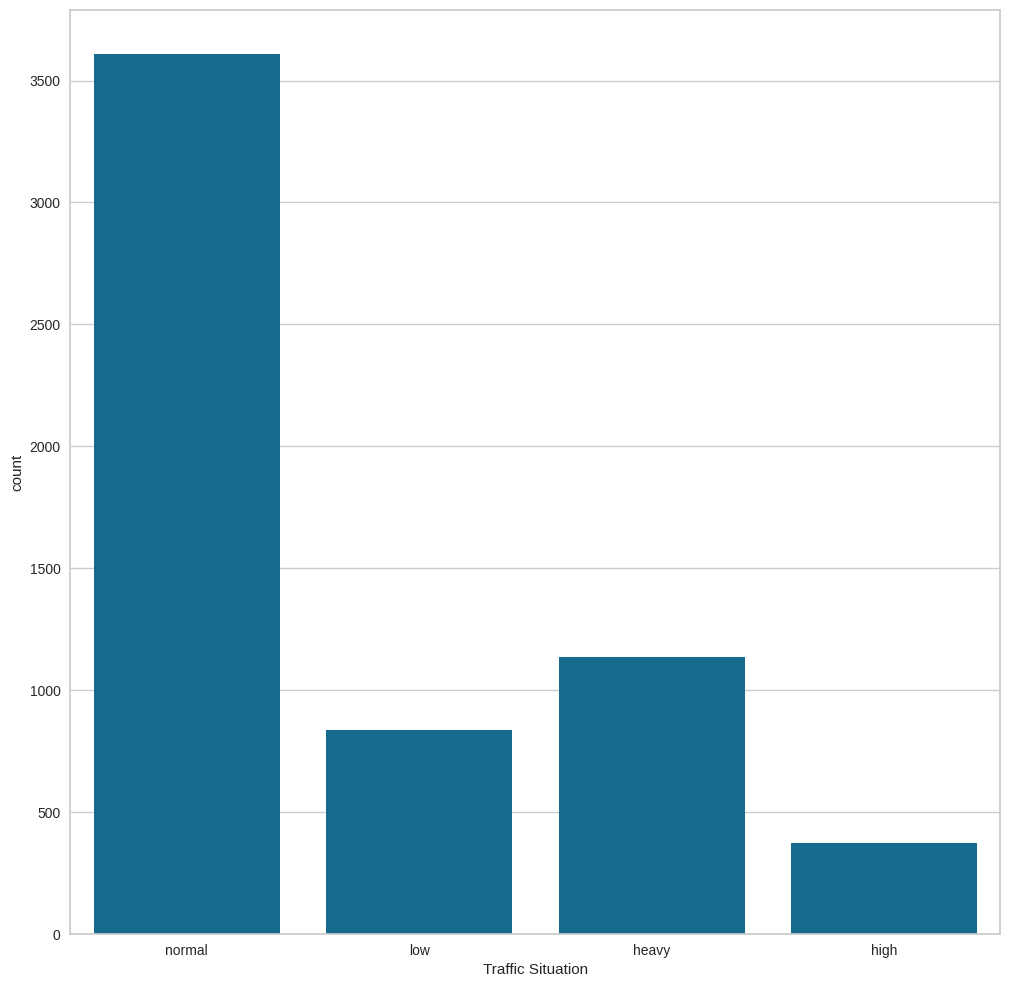

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(data=df,x='Traffic Situation')
plt.show()

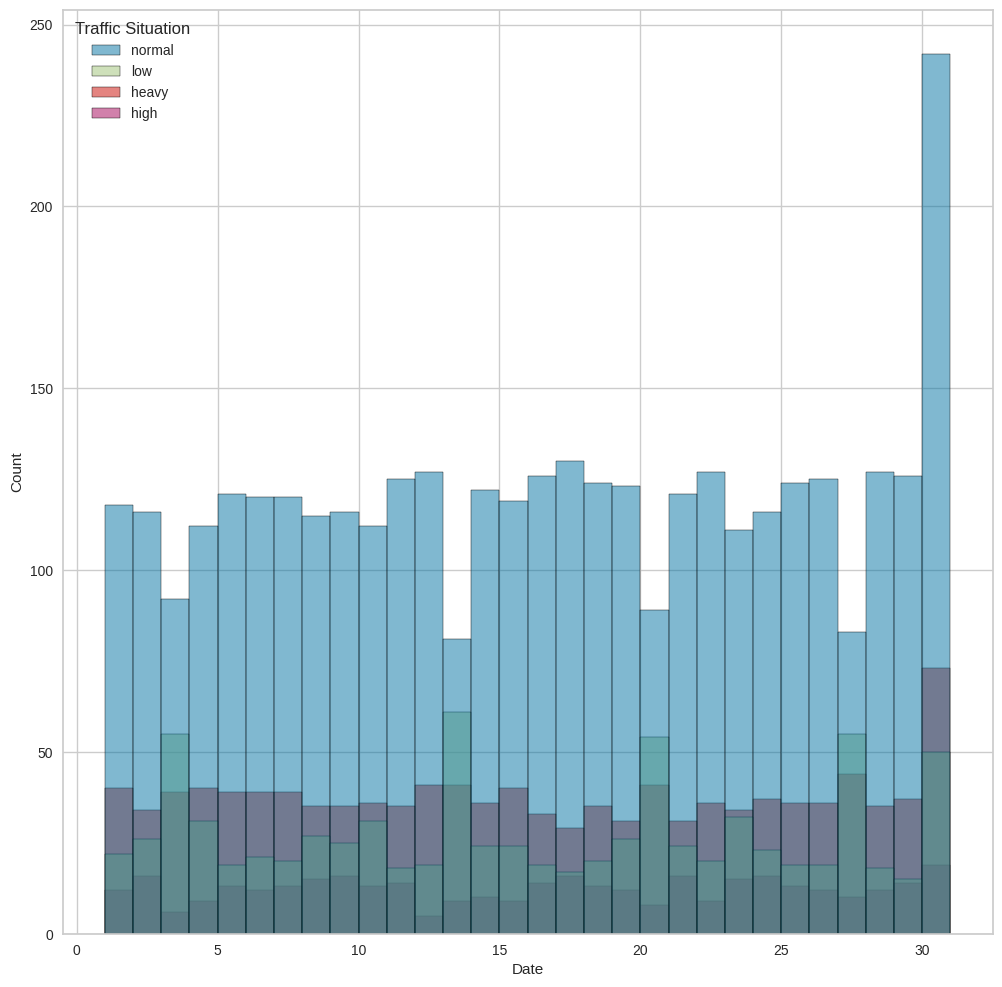

In [ ]:
plt.figure(figsize=(12,12))
sns.histplot(data=df,x='Date',hue='Traffic Situation',bins=30)
plt.show()

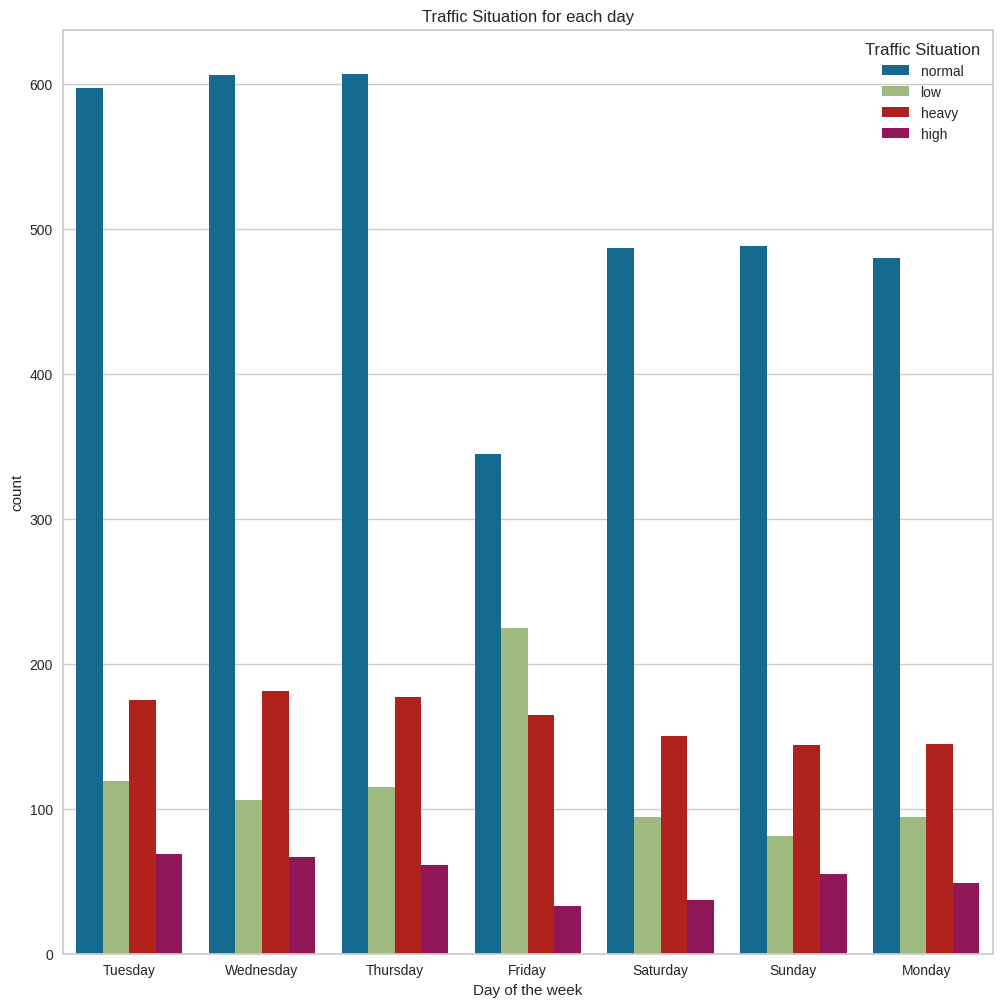

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(data=df,x='Day of the week',hue='Traffic Situation')
plt.title("Traffic Situation for each day")
plt.show()

In [ ]:
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [ ]:
# Chuyển đổi cột 'Time' thành số phút kể từ nửa đêm
from datetime import datetime
def convert_time_to_minutes(time_str):
    time_obj = datetime.strptime(time_str, '%I:%M:%S %p')
    return time_obj.hour * 60 + time_obj.minute

# df['Time'] = df['Time'].apply(convert_time_to_minutes)

In [ ]:
# Mã hóa 'Day of the week' bằng OneHotEncoder
day_encoder = OneHotEncoder(sparse_output=False, drop='first')
day_encoded = day_encoder.fit_transform(df[['Day of the week']])
day_encoded_df = pd.DataFrame(day_encoded, columns=day_encoder.get_feature_names_out(['Day of the week']))

In [ ]:
# Mã hóa 'Time' bằng LabelEncoder
le_time = LabelEncoder()
df['Time'] = le_time.fit_transform(df['Time'])

In [ ]:
def prepare_input_data(time_str, day, month, car_count, bus_count, bike_count, truck_count, day_of_week_str):
    # Chuyển đổi thời gian thành phút
    time_in_minutes = convert_time_to_minutes(time_str)

    # Chuyển đổi ngày trong tuần thành mã hóa nhị phân
    day_encoded = day_encoder.transform([[day_of_week_str]])
    day_encoded_df = pd.DataFrame(day_encoded, columns=day_encoder.get_feature_names_out(['Day of the week']))

    # Sử dụng 'day' như một số nguyên (ngày trong tháng)
    date_value = day  # Date dưới dạng số nguyên

    # Tạo cột 'Total' từ tổng số lượng xe
    total_traffic = car_count + bus_count + bike_count + truck_count

    # Chuẩn bị dữ liệu đầu vào
    input_data = {
        'Time': time_in_minutes,
        'Date': date_value,
        'Total': total_traffic,
        'CarCount': car_count,
        'BusCount': bus_count,
        'BikeCount': bike_count,
        'TruckCount': truck_count
    }

    # Kết hợp các cột mã hóa ngày trong tuần vào input_data
    input_data_df = pd.DataFrame([input_data])
    input_data_final = pd.concat([input_data_df, day_encoded_df], axis=1)

    # Đảm bảo rằng cột đầu vào có cùng thứ tự với cột trong x_train
    input_data_final = input_data_final[x_train.columns]

    return input_data_final

In [ ]:
# Tạo lại DataFrame với các cột mã hóa
df_encoded = pd.concat([df, day_encoded_df], axis=1)

In [ ]:
# Chia dữ liệu thành X (input) và y (output)
x = df_encoded.drop(['Traffic Situation', 'Day of the week'], axis=1)
y = df['Traffic Situation']

In [ ]:
x.head()

,Time,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday
0,16,10,13,2,2,24,41,0.0,0.0,0.0,0.0,1.0,0.0
1,18,10,14,1,1,36,52,0.0,0.0,0.0,0.0,1.0,0.0
2,20,10,10,2,2,32,46,0.0,0.0,0.0,0.0,1.0,0.0
3,22,10,10,2,2,36,50,0.0,0.0,0.0,0.0,1.0,0.0
4,24,10,11,2,1,34,48,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20,test_size=0.2)

In [ ]:
print(x_train.shape)  # Kích thước của x_train
print(y_train.shape)  # Kích thước của y_train

(4761, 13)
(4761,)


In [ ]:
# Khởi tạo và tìm kiếm tham số tối ưu với GridSearchCV
rf_model = RandomForestClassifier()
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid = GridSearchCV(rf_model, params, cv=5)
grid.fit(x_train, y_train)
best_rf_model = grid.best_estimator_

print('Grid best params:', grid.best_params_)
print('Grid best score:', grid.best_score_)

# Dự đoán trên tập kiểm tra và đánh giá hiệu suất
y_pred = grid.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Grid best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Grid best score: 0.9962195896196885
Accuracy: 0.9924433249370277
Precision: 0.9924732568123504
Recall: 0.9924433249370277
F1-Score: 0.9924121644478434


In [ ]:
# Tạo dữ liệu đầu vào mẫu cho dự đoán
input_example = prepare_input_data('4:30:00 AM', 1, 250, 100, 25, 75, 50, 'Monday')

# Dự đoán tình trạng giao thông
y_pred = best_rf_model.predict(input_example)

print("Dự đoán tình trạng giao thông:", y_pred)

Dự đoán tình trạng giao thông: ['heavy']


In [ ]:
from joblib import dump, load

# Giả sử 'grid' là kết quả mô hình đã huấn luyện của bạn
model = grid.best_estimator_

# Lưu mô hình vào file với tên 'traffic_model_3.pkl'
dump(model, 'traffic_model_fixed.pkl')


['traffic_model_fixed.pkl']